In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

import import_ipynb
from Polynome2p1 import *
import Fonctions_Test as FT

importing Jupyter notebook from Polynome2p1.ipynb
importing Jupyter notebook from Fonctions_Test.ipynb


In [2]:
fonctions_test = FT.fonctions("Sans Arg","Classic")

## Tests sur l'opérateur S

In [3]:
def test_approx_S(p,f,h,epsilon,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/S/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    
    return px,fx

In [4]:
h = [1e-2,1,1/4]
p = [21,11,11]
epsilon = [1e-9,1e-5,1e-9]
fonctions = FT.fonctions_etude_S()

############################################################################################################
######################        Fonction absolu_h_retard, p = 21, h = 0.01, epsilon = 1e-09     #######################
############################################################################################################
Residus à chaque itération:
 [0.01628073623184138, 0.004793164451231342, 0.0018881063169129714, 0.0008791071617256468, 0.0004550860965935578, 0.0002526217935165746, 0.00014691805288309269, 8.819633304819282e-05, 5.4147841771311335e-05, 3.380554823807239e-05, 2.1384510623590788e-05, 1.3672852334940573e-05, 8.820708173575618e-06, 5.733767609509182e-06, 3.7513363064714418e-06, 2.4679425788131527e-06, 1.6313253586673847e-06, 1.0826924683885764e-06, 7.210629903030932e-07, 4.816437322623442e-07, 3.2253437679891016e-07, 2.164530653267727e-07, 1.4553016717178583e-07, 9.800045687778807e-08, 6.60831163469653e-08, 4.4612501138695385e-08, 3.014776180701645e-08, 2.0390

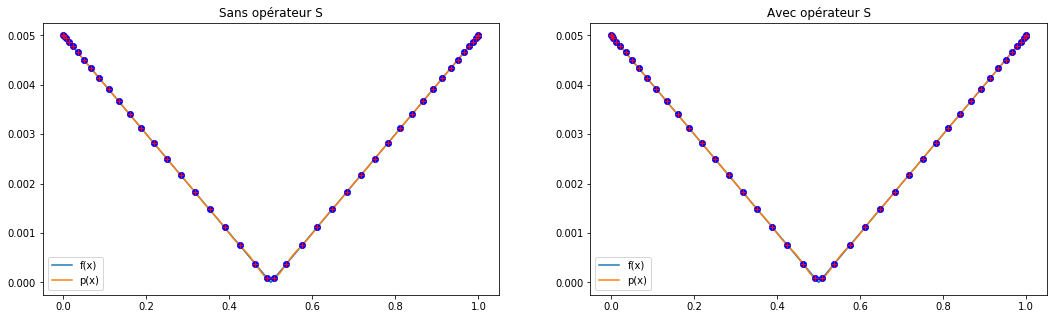

Sans opérateur Séparateur : 
     Norme 2 : 0.00019471256624624568
     Trapezes : 5.1945765062645575e-06
Avec opérateur Séparateur : 
     Norme 2 : 0.00019471256624624568
     Trapezes : 5.1945765062645575e-06

############################################################################################################
######################        Fonction abs_poly_h_7, p = 11, h = 1, epsilon = 1e-05     #######################
############################################################################################################
Residus à chaque itération:
 [0.16292395565425702, 0.08516853858935096, 0.05235563511216531, 0.03543551931126577, 0.02554412780361745, 0.019252261803033997, 0.015000110405786471, 0.011992219818645178, 0.009787186171864472, 0.008123638573794457, 0.0068386157402977495, 0.005826150222335801, 0.00501488521863327, 0.004355332137269698, 0.003812292433395932, 0.0033601793683477083, 0.0029800353794225925, 0.00265757632994271, 0.002381877090913452, 0.00214446869

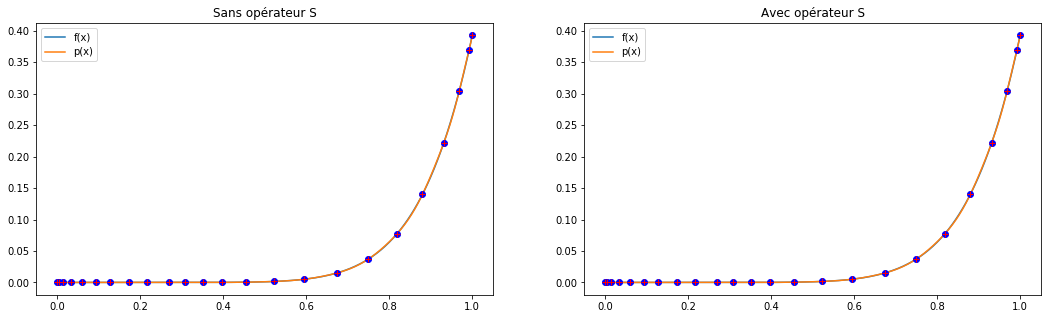

Sans opérateur Séparateur : 
     Norme 2 : 0.009564865197219208
     Trapezes : 0.00022127585531362065
Avec opérateur Séparateur : 
     Norme 2 : 0.009564865197219208
     Trapezes : 0.00022127585531362065

############################################################################################################
######################        Fonction gaussienne_h, p = 11, h = 0.25, epsilon = 1e-09     #######################
############################################################################################################
Residus à chaque itération:
 [0.13571707664398183, 0.0662469761903887, 0.03845743239482346, 0.024763462031116523, 0.01707147250982514, 0.012351961979383506, 0.009266374433091557, 0.007149906584744326, 0.00564258001701217, 0.004536075485275383, 0.003703297021677521, 0.0030632867720992636, 0.002562591433782837, 0.002164830341984665, 0.001844590604627542, 0.0015837164988038968, 0.001368978950455595, 0.0011905693493190833, 0.001041101400390653, 0.00091493484

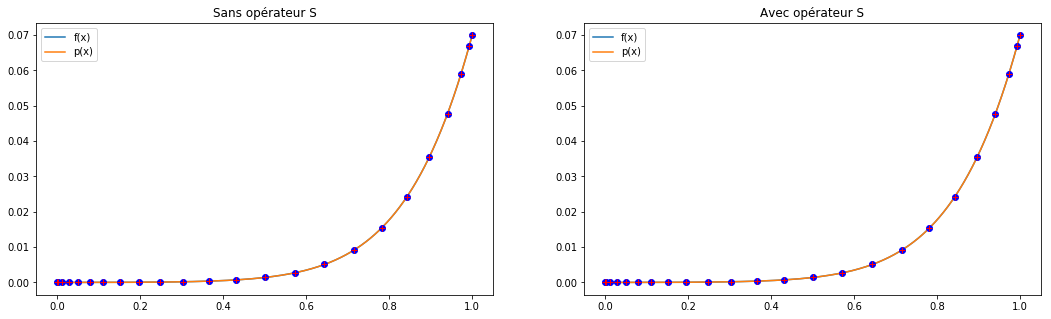

Sans opérateur Séparateur : 
     Norme 2 : 9.153713648091235e-05
     Trapezes : 2.4526697195364986e-06
Avec opérateur Séparateur : 
     Norme 2 : 9.153713648091235e-05
     Trapezes : 2.4526697195364986e-06



In [5]:
for i in range(3):
    name = str(fonctions[i]).split(' ')[1]
    print("############################################################################################################")
    print("######################        Fonction "+name+", p = "+str(p[i])+", h = "+str(h[i])+", epsilon = "\
          +str(epsilon[i])+"     #######################")
    print("############################################################################################################")
    plt.figure(0,figsize=(18,5))
    plt.subplot(1,2,1)
    sansS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Sans opérateur S")
    plt.subplot(1,2,2)
    avecS = test_approx_S(p[i],fonctions[i],h[i],epsilon[i],1,1)
    plt.title("Avec opérateur S")
    plt.show()
        
    print("Sans opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(sansS[0]-sansS[1]))
    print("     Trapezes :", trapezes(sansS[0]-sansS[1]))
    print("Avec opérateur Séparateur : ")
    print("     Norme 2 :", npl.norm(avecS[0]-avecS[1]))
    print("     Trapezes :",trapezes(sansS[0]-sansS[1]))
    print()

## Effet du point initial

In [6]:
def test_approx_init(p,f,h,epsilon,init,affichage=None,s=None,ResidusNewton=None):
    x = np.linspace(0,1,501)
    px, param_interpol,nb_iter = approxh(x,p,f,h,epsilon,init=init,s=s,ResidusNewton=ResidusNewton)

    interp, a_alpha,b_beta = param_interpol
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    
    fx = f(x,h) 

    if affichage != None and affichage != 0 : 
        plt.plot(x,fx,label="f(x)")
        plt.plot(x,px,label="p(x)")
        plt.plot(interp,f(interp,h),'ob')
        plt.plot(interp, pn(interp,Ap,Bp),'+r')
        plt.legend()
        name = str(f).split(' ')[1]
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/eps/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".eps", format='eps')
        plt.savefig("./Images/EtudesParamOpe/Operateurs/Init/png/"+name+", p = "+str(p)+", h = "+str(h)+", epsilon = "+str(epsilon)+".png", format='png')
    return px,fx,nb_iter

In [7]:
def X_equi(p):
    x = np.linspace(0,0.5,2*(p+1))
    X = np.zeros(2*(p+1))
    X[:p+1] = x[1::2]
    X[p+1:] = x[::2] 
    return X

################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [6.129773419737218e-07, 5.565342645682626e-10]


Polynome2p1.ipynb:33: RuntimeWarning: invalid value encountered in sqrt
  },


Erreur
X est devenu négatif ou supérieur à 1


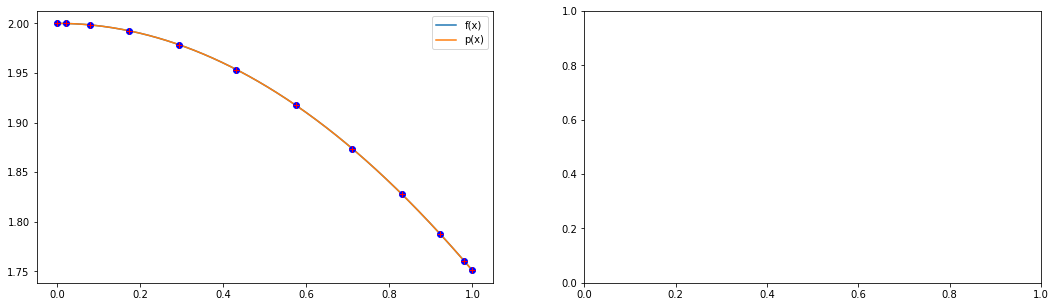

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  2.829598043252703e-08     -1.0
    Norme inf :  3.2560101281831066e-09     -1.0
    Trapeze :  9.263018843075339e-10     -1.0
    Nb_iteration :  2.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.0003494584750582498, 9.165818632415804e-06, 3.0007839755359334e-07, 1.1245008731912043e-08, 4.5537301920336046e-10]
Erreur
X est devenu négatif ou supérieur à 1


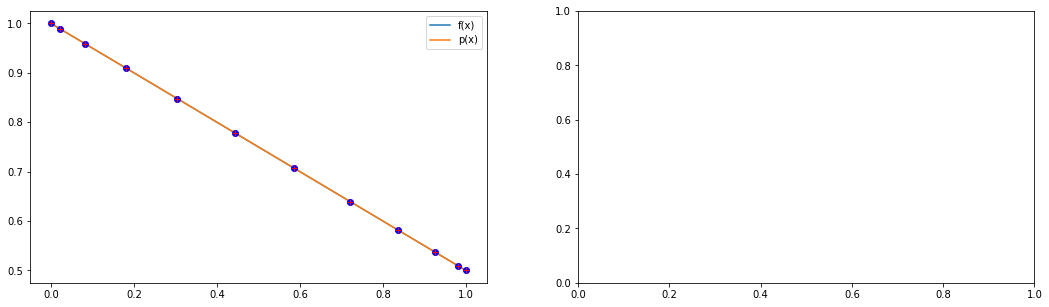

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  8.397006819783786e-09     -1.0
    Norme inf :  1.0449335841045126e-09     -1.0
    Trapeze :  2.45549138244705e-10     -1.0
    Nb_iteration :  5.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.0003776516669662604, 1.1526396318509614e-05, 4.3231595115787696e-07, 1.8304357253739785e-08, 8.371750579662985e-10]
Erreur
X est devenu négatif ou supérieur à 1


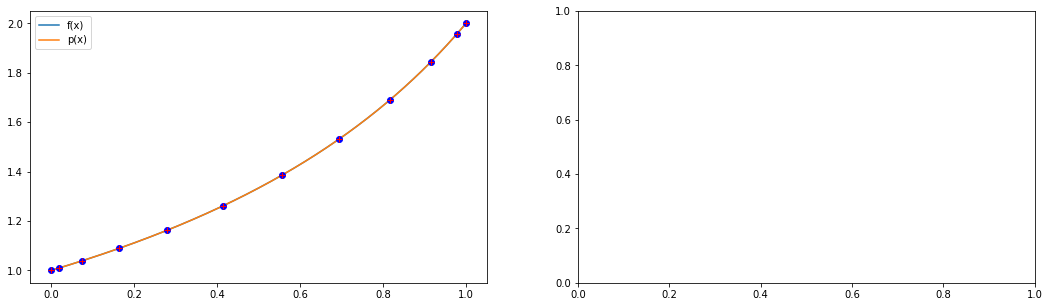

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  5.145363456840673e-08     -1.0
    Norme inf :  4.077993276396796e-09     -1.0
    Trapeze :  1.9540575206811178e-09     -1.0
    Nb_iteration :  5.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.048564955961447845, 0.013632613911685174, 0.0045624917448806365, 0.0017119899007681867, 0.0006940613701548235, 0.00029729813334139314, 0.000132767398853243, 6.125722638412495e-05, 2.8995546524812317e-05, 1.4003698584879774e-05, 6.873485800669455e-06, 3.4194448052291457e-06, 1.7209097616193361e-06, 8.749087270787482e-07, 4.487875004876911e-07, 2.3200864156612055e-07, 1.2075097478093789e-07, 6.320730368377914e-08, 3.324605092386e-08, 1.755748068022406

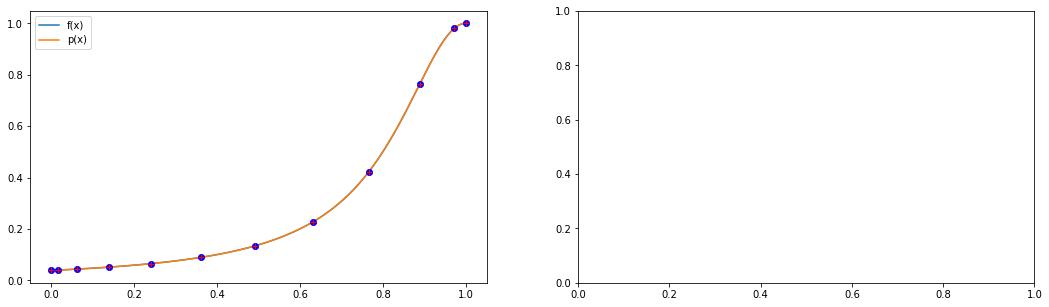

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.01270338070391741     -1.0
    Norme inf :  0.0017653513813130628     -1.0
    Trapeze :  0.00033473809462668724     -1.0
    Nb_iteration :  21.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.10650937980562408, 0.043826685626943515, 0.020527152089307662, 0.010439187137795894, 0.005637890314155643, 0.0031939293646370296, 0.0018796027274549183, 0.0011389004892634687, 0.0007051718808830785, 0.0004436022370706071, 0.0002824068600252034, 0.00018150197949878979, 0.00011760433376417207, 7.677611935892935e-05, 5.049052397645027e-05, 3.345044310913379e-05, 2.2329131378156315e-05, 1.502045591390719e-05, 1.018258353368558e-05, 6.955941510893944e-06,

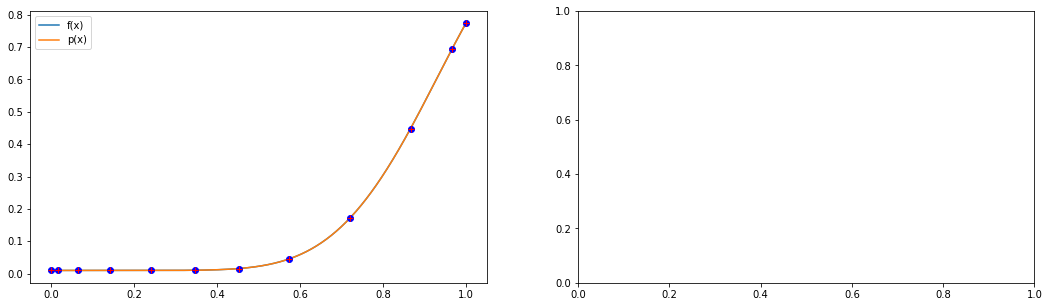

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  6.079123481863509e-05     -1.0
    Norme inf :  9.663379969104824e-06     -1.0
    Trapeze :  1.3803733545799407e-06     -1.0
    Nb_iteration :  40.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.13114392593267182, 0.06807697685449093, 0.041384453975346056, 0.02764699985359184, 0.019651972584875037, 0.014598836947851078, 0.01121074588412184, 0.00883539973807823, 0.007110642251819865, 0.005822254782298061, 0.004837015375053437, 0.004068616261569706, 0.003459199180942597, 0.0029688333575105673, 0.0025692612515846695, 0.0022400449361726017, 0.0019661164438031778, 0.001736177350043595, 0.001541627475727546, 0.001375832037519876, 0.0012336104438

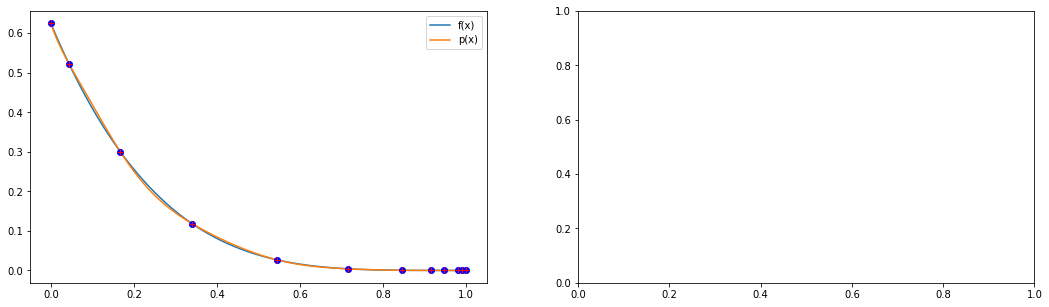

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.07898677852578731     -1.0
    Norme inf :  0.009491036186248025     -1.0
    Trapeze :  0.0023172098479295826     -1.0
    Nb_iteration :  100.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.001226016826313205, 4.935682629860261e-05, 2.4486381196892164e-06, 1.3465368065788044e-07, 7.964545590657125e-09]
Erreur
X est devenu négatif ou supérieur à 1


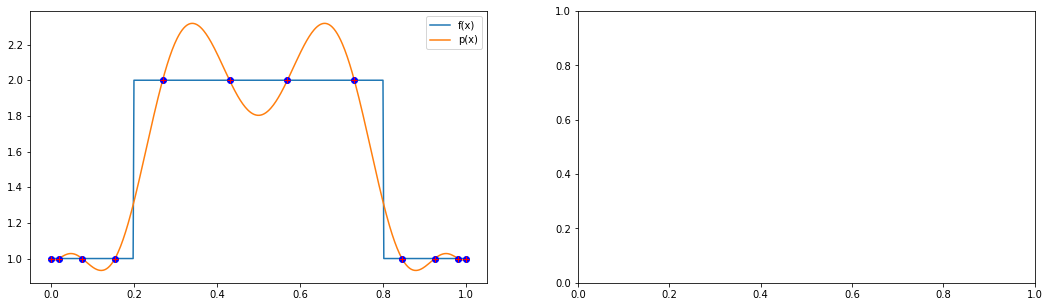

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  4.692507619043562     -1.0
    Norme inf :  0.680724202058284     -1.0
    Trapeze :  0.1509202202555946     -1.0
    Nb_iteration :  5.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [2.3666940352564767e-05, 1.7059321564333186e-07, 1.557728773655992e-09]
Erreur
X est devenu négatif ou supérieur à 1


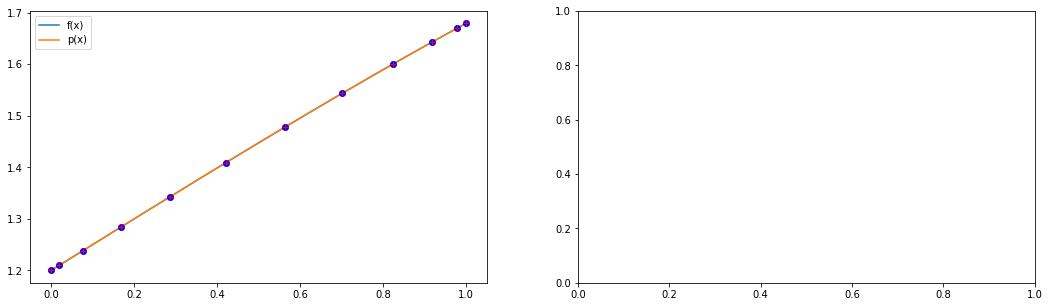

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  5.7331782326230296e-08     -1.0
    Norme inf :  5.883716180932197e-09     -1.0
    Trapeze :  1.8754873178927757e-09     -1.0
    Nb_iteration :  3.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################
Residus à chaque itération:
 [0.16852036815554935, 0.08652353166241958, 0.051902384457100374, 0.03437023864418205, 0.02427456751905024, 0.01793681814076267, 0.013708708752728251, 0.010757063141774725, 0.008622078994986689, 0.007032788046074516, 0.0058211583263541745, 0.004878635286010369, 0.0041326719284516915, 0.0035333739046567564, 0.0030455670575417313, 0.0026439128315493567, 0.0023098061763901054, 0.0020293518293704417, 0.0017920124576975816, 0.00158968635045128, 0.0014160661

Polynome2p1.ipynb:19: RuntimeWarning: invalid value encountered in sqrt
  "import matplotlib.pyplot as plt\n",


Erreur
X est devenu négatif ou supérieur à 1


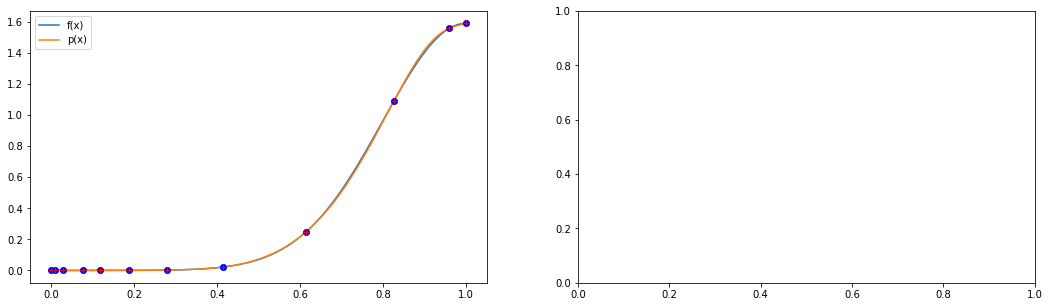

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  0.12709822536560902     -1.0
    Norme inf :  0.015379909068901965     -1.0
    Trapeze :  0.003404291468421223     -1.0
    Nb_iteration :  100.0     -1.0


################################################################################################
##########    Fonction poly_17_h, Init = init_X, h =0.5, p5, eps = 1e-09        ################
################################################################################################


Polynome2p1.ipynb:31: RuntimeWarning: divide by zero encountered in double_scalars
  "# Polynome de degré $n = 2p + 1$ "


Residus à chaque itération:
 [inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
Erreur
X est devenu négatif ou supérieur à 1


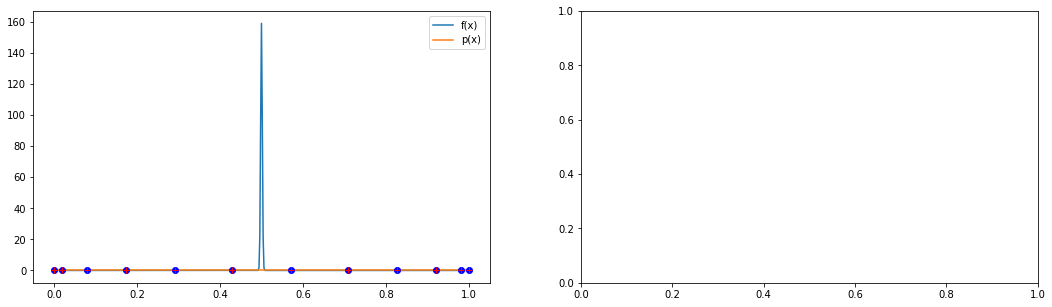

Erreur pour init_x et x_equi (respectivement): 
    Norme 2 :  211.8995633303015     -1.0
    Norme inf :  159.15494309089536     -1.0
    Trapeze :  0.7978845660079886     -1.0
    Nb_iteration :  100.0     -1.0




In [8]:
   h = 1/2
p = 5
epsilon = 1e-9
fonctions = FT.fonctions("Sans Arg")
init = [init_X,X_equi]
Err = -1 * np.ones((len(fonctions),len(init),4))
    

for f in range(len(fonctions)) : 
    print("################################################################################################")
    print(("##########    Fonction "+str(fonctions).split(' ')[1]+", Init = "+ str(init).split(' ')[1]+", h ="+str(h)+\
    ", p"+str(p)+", eps = "+str(epsilon)+"        ################"))
    print("################################################################################################")
    plt.figure(figsize=(18,5))
    for i in range(len(init)) : 
        plt.subplot(1,2,i+1)
        try : 
            px,fx,nb_iter = test_approx_init(p,fonctions[f],h,epsilon,init[i],1)
            Err[f,i,0] = npl.norm(px-fx) 
            Err[f,i,1] = npl.norm(px-fx,np.inf)
            Err[f,i,2] = trapezes(px-fx)
            Err[f,i,3] = nb_iter
        except ValueError:
            print("Erreur\nX est devenu négatif ou supérieur à 1")
    plt.show()
    print("Erreur pour init_x et x_equi (respectivement): ")
    print("    Norme 2 : ", Err[f,0,0],"   ", Err[f,1,0])
    print("    Norme inf : ", Err[f,0,1],"   ", Err[f,1,1])
    print("    Trapeze : ", Err[f,0,2],"   ", Err[f,1,2])
    print("    Nb_iteration : ", Err[f,0,3],"   ", Err[f,1,3])
    print("\n")
       ##peut etre faire la différence entre les deux resultats